In [ ]:
# 그래프에서 한글 출력 설정
#1. 한글 설정 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,084 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and dire

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

import missingno as msno # 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'/content/drive/MyDrive/24_소모임/beyond_1/'

'/content/drive/MyDrive/24_소모임/beyond_1/'

In [ ]:
path = '/content/drive/MyDrive/24_소모임/beyond_1/'
df = pd.read_excel( path + '평균초혼연령_시군구별__20241118210602.xlsx')
df.head()


,시군구별,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,시군구별,아내,남편,아내,남편,아내,남편,아내,남편,아내,...,아내,남편,아내,남편,아내,남편,아내,남편,아내,남편
1,전국,26.49,29.28,26.78,29.55,27.01,29.77,27.27,30.14,27.52,...,30.59,33.37,30.78,33.23,31.08,33.35,31.26,33.72,31.45,33.97
2,서울특별시,27.25,29.65,27.52,29.88,27.78,30.12,28.02,30.51,28.31,...,31.55,33.72,31.6,33.61,31.91,33.85,32.15,34.17,32.42,34.38
3,부산광역시,26.74,29.43,27.04,29.68,27.26,29.95,27.6,30.35,27.9,...,31.04,33.54,31.08,33.39,31.3,33.4,31.67,33.94,31.95,34.31
4,대구광역시,26.51,29.1,26.77,29.43,27.09,29.65,27.33,29.9,27.66,...,30.62,33.36,30.67,33.08,31.03,33.32,31.22,33.63,31.43,33.71


In [ ]:
#0번 행삭제
df = df.drop(0)
df.head()

,시군구별,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
1,전국,26.49,29.28,26.78,29.55,27.01,29.77,27.27,30.14,27.52,...,30.59,33.37,30.78,33.23,31.08,33.35,31.26,33.72,31.45,33.97
2,서울특별시,27.25,29.65,27.52,29.88,27.78,30.12,28.02,30.51,28.31,...,31.55,33.72,31.6,33.61,31.91,33.85,32.15,34.17,32.42,34.38
3,부산광역시,26.74,29.43,27.04,29.68,27.26,29.95,27.6,30.35,27.9,...,31.04,33.54,31.08,33.39,31.3,33.4,31.67,33.94,31.95,34.31
4,대구광역시,26.51,29.1,26.77,29.43,27.09,29.65,27.33,29.9,27.66,...,30.62,33.36,30.67,33.08,31.03,33.32,31.22,33.63,31.43,33.71
5,인천광역시,26.39,29.21,26.64,29.38,26.85,29.58,27.11,30.03,27.32,...,30.59,33.25,30.7,32.96,30.95,33.21,31.29,33.63,31.57,33.79


In [ ]:
#시군구별을 기준으로 melt
df_초혼  = pd.melt(df, id_vars=['시군구별'],
                    var_name='연도정보',
                    value_name='평균초혼연령')

In [ ]:
df_초혼

,시군구별,연도정보,평균초혼연령
0,전국,2000,26.49
1,서울특별시,2000,27.25
2,부산광역시,2000,26.74
3,대구광역시,2000,26.51
4,인천광역시,2000,26.39
...,...,...,...
907,전라남도,2023.1,34.03
908,경상북도,2023.1,33.72
909,경상남도,2023.1,33.82
910,제주특별자치도,2023.1,34.33


In [ ]:
#연도정보 열확인
df_초혼['연도정보'].unique()

array(['2000', '2000.1', '2001', '2001.1', '2002', '2002.1', '2003',
       '2003.1', '2004', '2004.1', '2005', '2005.1', '2006', '2006.1',
       '2007', '2007.1', '2008', '2008.1', '2009', '2009.1', '2010',
       '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1',
       '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017',
       '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1',
       '2021', '2021.1', '2022', '2022.1', '2023', '2023.1'], dtype=object)

In [ ]:
df_초혼[['연도','성별']]= df_초혼['연도정보'].str.split('.', expand=True)
df_초혼

,시군구별,연도정보,평균초혼연령,연도,성별
0,전국,2000,26.49,2000,None
1,서울특별시,2000,27.25,2000,None
2,부산광역시,2000,26.74,2000,None
3,대구광역시,2000,26.51,2000,None
4,인천광역시,2000,26.39,2000,None
...,...,...,...,...,...
907,전라남도,2023.1,34.03,2023,1
908,경상북도,2023.1,33.72,2023,1
909,경상남도,2023.1,33.82,2023,1
910,제주특별자치도,2023.1,34.33,2023,1


In [ ]:
df_초혼['성별'].unique()

array([None, '1'], dtype=object)

In [ ]:
df_초혼[df_초혼['성별'].isnull()]

,시군구별,연도정보,평균초혼연령,연도,성별
0,전국,2000,26.49,2000,None
1,서울특별시,2000,27.25,2000,None
2,부산광역시,2000,26.74,2000,None
3,대구광역시,2000,26.51,2000,None
4,인천광역시,2000,26.39,2000,None
...,...,...,...,...,...
888,전라남도,2023,30.83,2023,None
889,경상북도,2023,31.06,2023,None
890,경상남도,2023,31.26,2023,None
891,제주특별자치도,2023,31.72,2023,None


In [ ]:
df_초혼['성별'].fillna('아내',inplace=True)

In [ ]:
df_초혼.loc[df_초혼['성별']=='1', '성별'] = '남편'


In [ ]:
df_초혼['성별'].unique()

array(['아내', '남편'], dtype=object)

In [ ]:
df_초혼.columns

Index(['시군구별', '연도정보', '평균초혼연령', '연도', '성별'], dtype='object')

In [ ]:
df_초혼= df_초혼[['시군구별',  '평균초혼연령', '연도', '성별']]

In [ ]:
df_초혼.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    912 non-null    object
 1   평균초혼연령  912 non-null    object
 2   연도      912 non-null    object
 3   성별      912 non-null    object
dtypes: object(4)
memory usage: 28.6+ KB


In [ ]:
df_초혼.loc[df_m['평균초혼연령']=='-','평균초혼연령' ] = np.nan

In [ ]:
df_초혼['평균초혼연령'] =  pd.to_numeric(df_초혼['평균초혼연령'], errors='coerce')

In [ ]:
#세종특별자치시의 '-'값을 결측값으로 변경
df_초혼['시군구별'] =df_초혼['시군구별'].replace('-', np.nan)

In [ ]:
#전국의 연도별 평균 초혼연령 확인을위한 필터링
df_전국 = df_초혼.loc[df_초혼['시군구별']=='전국']

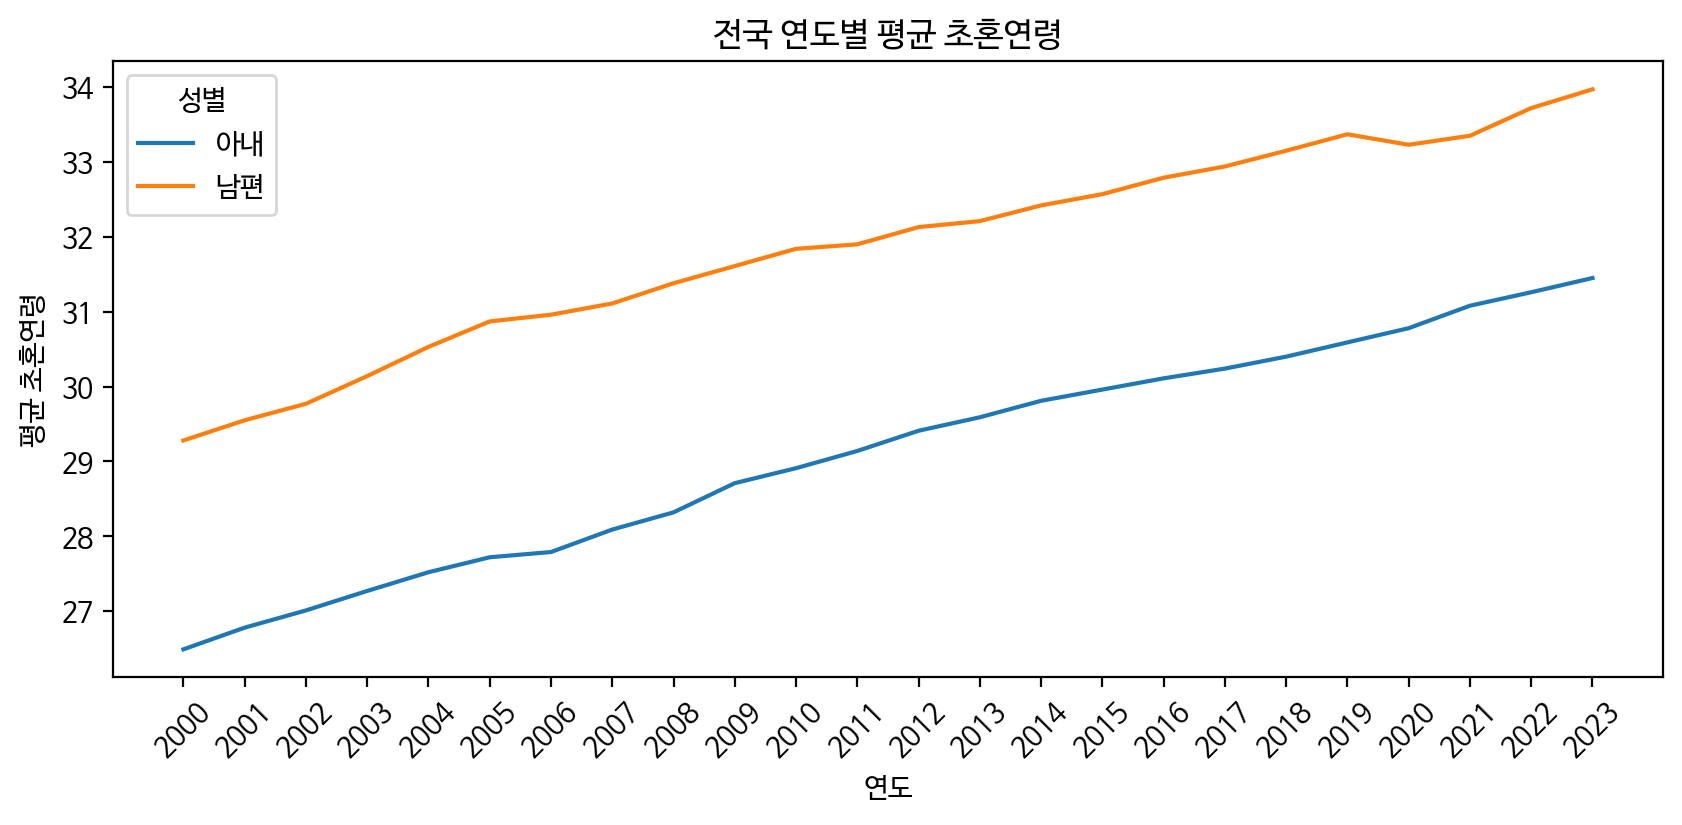

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_전국, x='연도', y='평균초혼연령', hue='성별')
plt.title('전국 연도별 평균 초혼연령')
plt.xlabel('연도')
plt.ylabel('평균 초혼연령')
plt.xticks(rotation=45) # x축 값 45도 회전
plt.show()

In [ ]:
#전국의 연도별 평균 초혼연령 확인
df_기타 = df_초혼.loc[df_초혼['시군구별']!='전국']
df_기타['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도', '국외'], dtype=object)

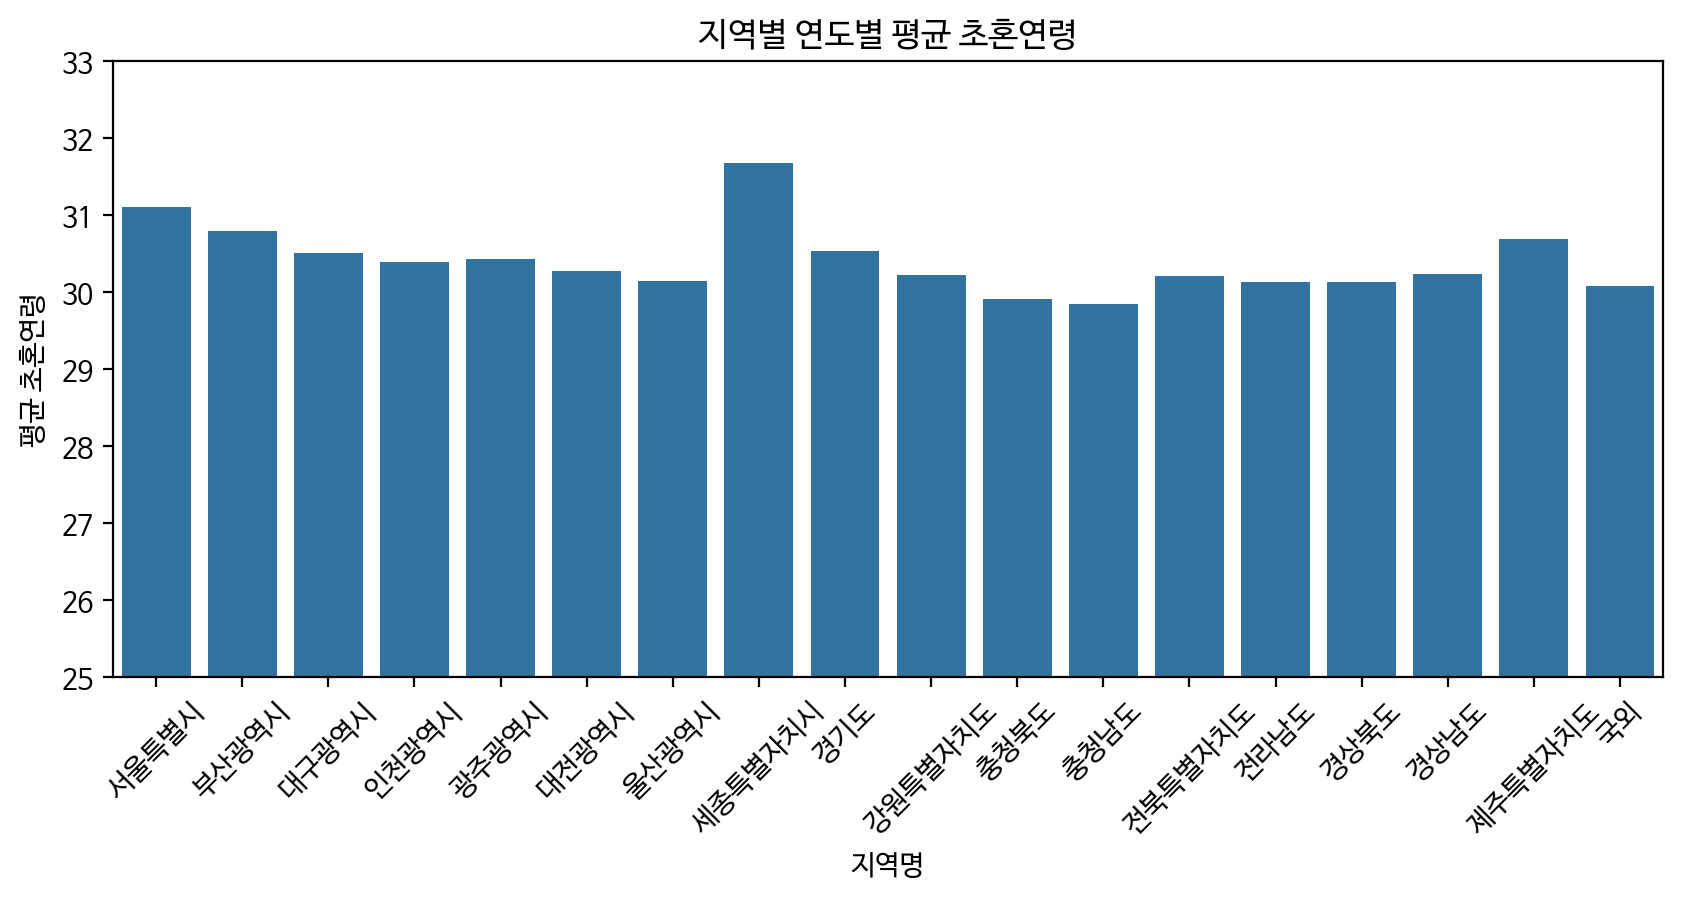

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(data=df_기타, x='시군구별', y='평균초혼연령',ci=None)
plt.title('지역별 연도별 평균 초혼연령')
plt.xlabel('지역명')
plt.ylabel('평균 초혼연령')
plt.xticks(rotation=45) # x축 값 45도 회전
# y축 범위 설정
plt.ylim(25, 33)
plt.show()

#연령별_출산율_및_합계출산율_행정구역별__20241118210451.xlsx

In [ ]:
df = pd.read_excel( path + '연령별_출산율_및_합계출산율_행정구역별__20241118210451.xlsx')
df.head(3)

,행정구역별,2000,2000.1,2000.2,2000.3,2000.4,2000.5,2000.6,2000.7,2001,...,2022.6,2022.7,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
0,행정구역별,합계출산율 (가임여성 1명당 명),모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명),20~24세 (해당연령 여자인구 1천명당 명),25~29세 (해당연령 여자인구 1천명당 명),30~34세 (해당연령 여자인구 1천명당 명),35~39세 (해당연령 여자인구 1천명당 명),40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명),합계출산율 (가임여성 1명당 명),...,40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명),합계출산율 (가임여성 1명당 명),모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명),20~24세 (해당연령 여자인구 1천명당 명),25~29세 (해당연령 여자인구 1천명당 명),30~34세 (해당연령 여자인구 1천명당 명),35~39세 (해당연령 여자인구 1천명당 명),40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명)
1,전국,1.48,2.6,39.2,150.3,84.1,17.6,2.7,0.2,1.309,...,8,0.2,0.721,0.3,3.8,21.4,66.7,43,7.9,0.2
2,서울특별시,1.275,1.3,23.5,121.4,90.2,18.8,2.6,0.2,1.111,...,8.7,0.2,0.552,0.2,1.3,8.5,47.3,43.1,8.7,0.2


In [ ]:
df.columns

Index(['행정구역별', '2000', '2000.1', '2000.2', '2000.3', '2000.4', '2000.5',
       '2000.6', '2000.7', '2001',
       ...
       '2022.6', '2022.7', '2023', '2023.1', '2023.2', '2023.3', '2023.4',
       '2023.5', '2023.6', '2023.7'],
      dtype='object', length=193)

In [ ]:
#시군구별을 기준으로 melt
df_출산율 = pd.melt(df, id_vars=['행정구역별'],
                    var_name='연도정보',
                    value_name='출산율')

In [ ]:
df_출산율.head(10)

,행정구역별,연도정보,출산율
0,행정구역별,2000,합계출산율 (가임여성 1명당 명)
1,전국,2000,1.48
2,서울특별시,2000,1.275
3,부산광역시,2000,1.235
4,대구광역시,2000,1.378
5,인천광역시,2000,1.473
6,광주광역시,2000,1.636
7,대전광역시,2000,1.501
8,울산광역시,2000,1.633
9,세종특별자치시,2000,-


In [ ]:
df_출산율['행정구역별'].unique()

array(['행정구역별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도',
       '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df_출산율.loc[df_출산율['행정구역별']=='행정구역별'].head(10)

#행정구역별 행의 정보는 의미없어보인다.

,행정구역별,연도정보,출산율
0,행정구역별,2000,합계출산율 (가임여성 1명당 명)
19,행정구역별,2000.1,모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명)
38,행정구역별,2000.2,20~24세 (해당연령 여자인구 1천명당 명)
57,행정구역별,2000.3,25~29세 (해당연령 여자인구 1천명당 명)
76,행정구역별,2000.4,30~34세 (해당연령 여자인구 1천명당 명)
95,행정구역별,2000.5,35~39세 (해당연령 여자인구 1천명당 명)
114,행정구역별,2000.6,40~44세 (해당연령 여자인구 1천명당 명)
133,행정구역별,2000.7,45~49세 (해당연령 여자인구 1천명당 명)
152,행정구역별,2001,합계출산율 (가임여성 1명당 명)
171,행정구역별,2001.1,모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명)


In [ ]:
df_출산율[['연도','구분']]= df_출산율['연도정보'].str.split('.', expand=True)
df_출산율

,행정구역별,연도정보,출산율,연도,구분
0,행정구역별,2000,합계출산율 (가임여성 1명당 명),2000,None
1,전국,2000,1.48,2000,None
2,서울특별시,2000,1.275,2000,None
3,부산광역시,2000,1.235,2000,None
4,대구광역시,2000,1.378,2000,None
...,...,...,...,...,...
3643,전라북도,2023.7,0.2,2023,7
3644,전라남도,2023.7,0.2,2023,7
3645,경상북도,2023.7,0.1,2023,7
3646,경상남도,2023.7,0.1,2023,7


In [ ]:
df_출산율.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정구역별      3648 non-null   object
 1   연도정보       3648 non-null   object
 2   출산율  3648 non-null   object
 3   연도         3648 non-null   object
 4   구분         3192 non-null   object
dtypes: object(5)
memory usage: 142.6+ KB


In [ ]:
df_출산율['구분'].unique()

array([None, '1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [ ]:
age_mapping = {
    None: '합계',
    '1': '15-19',
    '2': '20-24',
    '3': '25-29',
    '4': '30-34',
    '5': '35-39',
    '6': '40-44',
    '7': '45-49'
}

In [ ]:
df_출산율['연령대'] = df_출산율['구분'].replace(age_mapping)

In [ ]:
df_출산율['출산율'] =  pd.to_numeric(df_출산율['출산율'], errors='coerce')
#연속형 데이터으로 처리하기 위한 실수로 자료형 변환

In [ ]:
df_출산율.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정구역별      3648 non-null   object 
 1   연도정보       3648 non-null   object 
 2   출산율  3360 non-null   float64
 3   연도         3648 non-null   object 
 4   구분         3192 non-null   object 
 5   연령대        3648 non-null   object 
dtypes: float64(1), object(5)
memory usage: 171.1+ KB


In [ ]:
df_출산율 = df_출산율.loc[df_출산율['행정구역별'] !='행정구역별' ]
#행정구역별 값을 제외한 나머지 데이터를 분석해야함으로 제외하고 데이터프레임 구성

In [ ]:
df_출산율 = df_출산율[['행정구역별',  '출산율', '연도',  '연령대']]

In [ ]:
df_출산율

,행정구역별,출산율,연도,연령대
1,전국,1.480,2000,합계
2,서울특별시,1.275,2000,합계
3,부산광역시,1.235,2000,합계
4,대구광역시,1.378,2000,합계
5,인천광역시,1.473,2000,합계
...,...,...,...,...
3643,전라북도,0.200,2023,45-49
3644,전라남도,0.200,2023,45-49
3645,경상북도,0.100,2023,45-49
3646,경상남도,0.100,2023,45-49


#병합
- 병합시 열이름과 열의 항목에 대한 주의사향
    - 두 데이터프레임 열의 이름이 동일
    - 병합하는 키로 사용하는 열의 자료형과 항목이 동일한가도 확인

In [ ]:
df_출산율.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 1 to 3647
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정구역별      3456 non-null   object 
 1   출산율  3360 non-null   float64
 2   연도         3456 non-null   object 
 3   연령대        3456 non-null   object 
dtypes: float64(1), object(3)
memory usage: 264.0+ KB


In [ ]:
df_출산율.columns

Index(['행정구역별', '출산율', '연도', '연령대'], dtype='object')

In [ ]:
#df_출산율['행정구역별'].unique() 수정전확인

In [ ]:
df_초혼['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도', '국외'], dtype=object)

In [ ]:
{'전라북도':'전북특별자치도'}

In [ ]:
#행정구역별 열 이름을 시군구별로 변경
df_출산율 = df_출산율.rename(columns={'행정구역별': '시군구별'})


In [ ]:
#행정구역별 열 값중 {'전라북도':'전북특별자치도'}로 변경
df_출산율['시군구별'] = df_출산율['시군구별'].replace({'전라북도':'전북특별자치도'})

In [ ]:
df_출산율['시군구별'].unique() #수정 후 확인

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
print(df_출산율.columns)
print(df_초혼.columns)

Index(['시군구별', '출산율', '연도', '연령대'], dtype='object')
Index(['시군구별', '평균초혼연령', '연도', '성별'], dtype='object')


In [ ]:
df_all = pd.merge(df_출산율, df_초혼, on=['시군구별', '연도'])
#['시군구별', '연도']을 키로 정하여 데이터프레임 변경
df_all.head()

,시군구별,출산율,연도,연령대,평균초혼연령,성별
0,전국,1.480,2000,합계,26.49,아내
1,전국,1.480,2000,합계,29.28,남편
2,서울특별시,1.275,2000,합계,27.25,아내
3,서울특별시,1.275,2000,합계,29.65,남편
4,부산광역시,1.235,2000,합계,26.74,아내


In [ ]:
df_all.columns

Index(['시군구별', '출산율', '연도', '연령대', '평균초혼연령', '성별'], dtype='object')

In [ ]:
df_전국 = df_all.loc[df_all['시군구별']=='전국']

In [ ]:
df_전국.head()

,시군구별,출산율,연도,연령대,평균초혼연령,성별
0,전국,1.48,2000,합계,26.49,아내
1,전국,1.48,2000,합계,29.28,남편
36,전국,2.60,2000,15-19,26.49,아내
37,전국,2.60,2000,15-19,29.28,남편
72,전국,39.20,2000,20-24,26.49,아내


In [ ]:
df_연도별 = df_전국.groupby('연도')[['출산율','평균초혼연령']].mean().reset_index()
df_연도별.head()

,연도,출산율,평균초혼연령
0,2000,37.272500,27.885
1,2001,32.926125,28.165
2,2002,29.584750,28.390
3,2003,29.961375,28.705
4,2004,29.308000,29.025


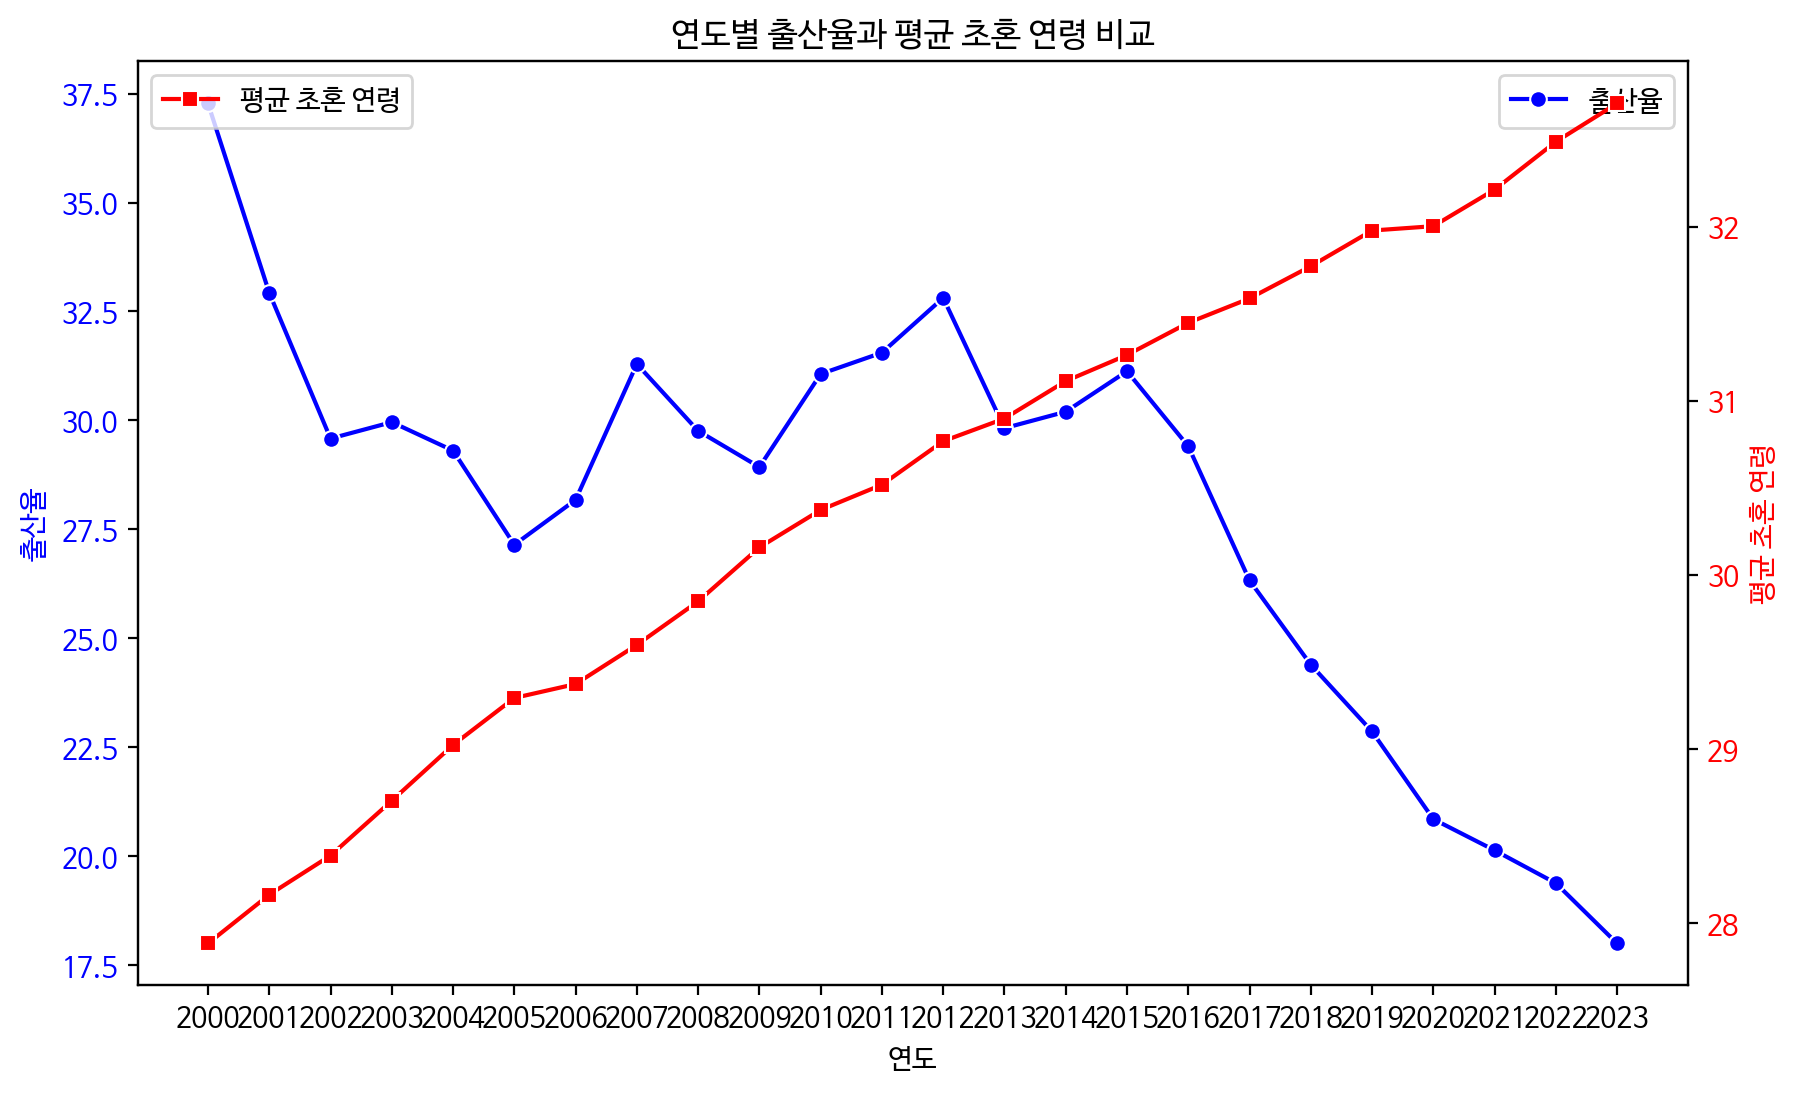

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 출산율 그래프 (왼쪽 y축)
sns.lineplot(x='연도', y='출산율', data=df_연도별, ax=ax1, color='blue', marker='o', label='출산율')
ax1.set_ylabel('출산율', color='blue')
ax1.tick_params('y', labelcolor='blue')

# 평균 초혼 연령 그래프 (오른쪽 y축)
ax2 = ax1.twinx()  # 두 번째 y축 생성
sns.lineplot(x='연도', y='평균초혼연령', data=df_연도별, ax=ax2, color='red', marker='s', label='평균 초혼 연령')
ax2.set_ylabel('평균 초혼 연령', color='red')
ax2.tick_params('y', labelcolor='red')

# 그래프 제목 및 범례 추가
plt.title('연도별 출산율과 평균 초혼 연령 비교')
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # 범례 위치 조정
plt.xticks(rotation=90)
plt.show()